## 拟合二次多项式回归

In [ ]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y)


In [2]:
def func(p, x):
    # 根据公式，定义 2 次多项式函数
    w0, w1, w2 = p
    f = w0 + w1 * x + w2 * x * x
    return f


def err_func(p, x, y):
    # 残差函数（观测值与拟合值之间的差距）
    ret = func(p, x) - y
    return ret

import numpy as np
from scipy.optimize import leastsq

p_init = np.random.randn(3)  # 生成 3 个随机数
# 使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))

print("Fitting Parameters: ", parameters[0])

Fitting Parameters:  [ 3.76893081e+01 -2.60473869e-01  8.00077751e-03]


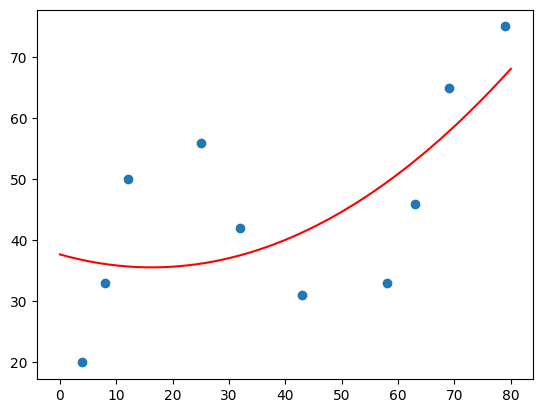

In [4]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制拟合函数曲线
plt.plot(x_temp, func(parameters[0], x_temp), "r")

# 绘制原数据点
plt.scatter(x, y)

## 拟合N次多项式回归

In [5]:
# n次多项式拟合
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数"""
    f = np.poly1d(p)
    return f(x)


def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）"""
    ret = fit_func(p, x) - y
    return ret


def n_poly(n):
    """n 次多项式拟合"""
    p_init = np.random.randn(n)  # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

n_poly(3)

array([ 8.00077884e-03, -2.60473987e-01,  3.76893098e+01])

Text(0.5, 1.0, 'm = 8')

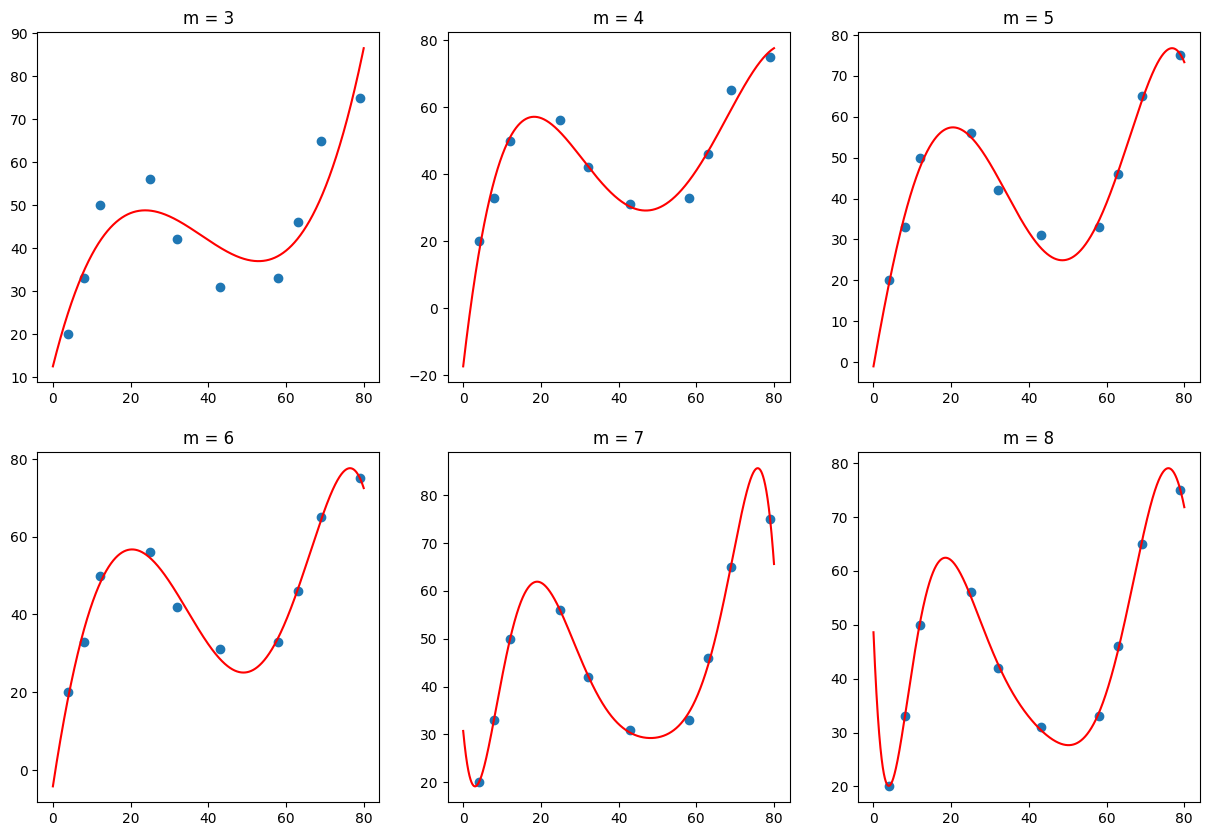

In [6]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(x_temp, fit_func(n_poly(4), x_temp), "r")
axes[0, 0].scatter(x, y)
axes[0, 0].set_title("m = 3")

axes[0, 1].plot(x_temp, fit_func(n_poly(5), x_temp), "r")
axes[0, 1].scatter(x, y)
axes[0, 1].set_title("m = 4")

axes[0, 2].plot(x_temp, fit_func(n_poly(6), x_temp), "r")
axes[0, 2].scatter(x, y)
axes[0, 2].set_title("m = 5")

axes[1, 0].plot(x_temp, fit_func(n_poly(7), x_temp), "r")
axes[1, 0].scatter(x, y)
axes[1, 0].set_title("m = 6")

axes[1, 1].plot(x_temp, fit_func(n_poly(8), x_temp), "r")
axes[1, 1].scatter(x, y)
axes[1, 1].set_title("m = 7")

axes[1, 2].plot(x_temp, fit_func(n_poly(9), x_temp), "r")
axes[1, 2].scatter(x, y)
axes[1, 2].set_title("m = 8")

## 使用 scikit-learn 进行多项式拟合

In [8]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(len(x), 1)  # 转换为列向量
y = np.array(y).reshape(len(y), 1)

# 使用 sklearn 得到 2 次多项式回归特征矩阵
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_features.fit_transform(x)

poly_x



array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

In [9]:
from sklearn.linear_model import LinearRegression

# 定义线性回归模型
model = LinearRegression()
model.fit(poly_x, y)  # 训练

# 得到模型拟合参数
model.intercept_, model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

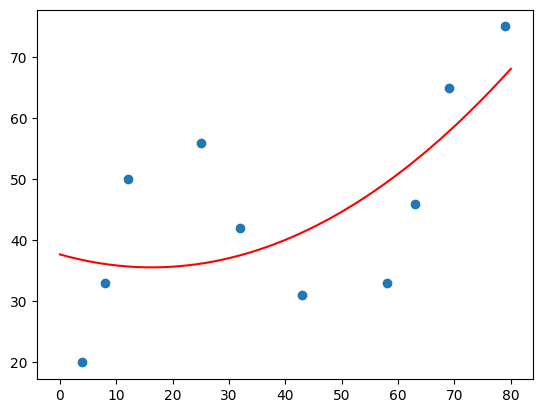

In [10]:
# 绘制拟合图像
x_temp = np.array(x_temp).reshape(len(x_temp), 1)
poly_x_temp = poly_features.fit_transform(x_temp)

plt.plot(x_temp, model.predict(poly_x_temp), "r")
plt.scatter(x, y)

## 多项式回归预测
本次预测实验中，我们使用到由世界卫生组织和联合国儿童基金会提供的「世界麻疹疫苗接种率」数据集。而目标则是预测相应年份的麻疹疫苗接种率。

In [12]:
import pandas as pd

# 加载数据集
df = pd.read_csv("../../datasets/course-6-vaccine.csv",
    header=0,
)
df

Year     Values
0   1983  48.676809
1   1984  50.653151
2   1985  45.603729
3   1986  45.511160
4   1987  52.882892
5   1988  62.710162
6   1989  68.354736
7   1990  73.618808
8   1991  69.748838
9   1992  69.905091
10  1993  70.517807
11  1994  62.019265
12  1995  73.887410
13  1996  73.376443
14  1997  75.599240
15  1998  71.236410
16  1999  70.783087
17  2000  72.381822
18  2001  74.997859
19  2002  72.610008
20  2003  80.104407
21  2004  75.126596
22  2005  72.750992
23  2006  85.550532
24  2007  82.033782
25  2008  76.587843
26  2009  82.602683
27  2010  80.786124
28  2011  78.931800
29  2012  83.456979
30  2013  85.124059
31  2014  87.375816
32  2015  82.704588
33  2016  85.898262

In [13]:
# 首先划分 dateframe 为训练集和测试集
train_df = df[: int(len(df) * 0.7)]
test_df = df[int(len(df) * 0.7) :]

# 定义训练和测试使用的自变量和因变量
X_train = train_df["Year"].values
y_train = train_df["Values"].values

X_test = test_df["Year"].values
y_test = test_df["Values"].values

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_train = y_train.reshape(len(y_train), 1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y = model.predict(X_test)
    print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(y_test, pre_y.flatten()))
    print("{} 次多项式均方误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差:  4.547691415327463
3 次多项式均方误差:  29.933052225452204
---
4 次多项式回归平均绝对误差:  4.426426082318572
4 次多项式均方误差:  29.05077448027926
---
5 次多项式回归平均绝对误差:  4.3416154890261165
5 次多项式均方误差:  28.221918744565357
---


## 多项式回归预测次数选择
我们可以选择一个误差指标，例如这里选择 MSE，然后计算出该指标随多项式次数增加而变化的图像，

MSE 计算结果:  [43.53185829515393, 464.32903847390224, 29.933052225452204, 29.05077448027926, 28.221918744565357, 27.440821641256715, 26.712320060084924, 26.03872956680725, 25.422418019111873, 24.86581842252457]


Text(0, 0.5, 'MSE')

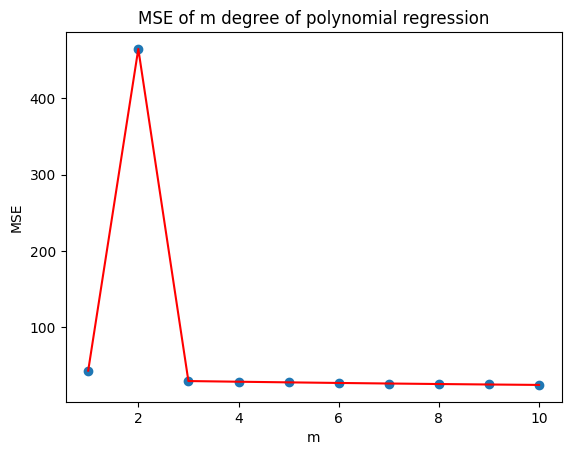

In [15]:
# 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
mse = []  # 用于存储各最高次多项式 MSE 值
m = 1  # 初始 m 值
m_max = 10  # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)  # 训练模型
    pre_y = model.predict(X_test)  # 测试模型
    mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, "r")
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")